# Alpaca-Llama
- about | [alpaca](https://crfm.stanford.edu/2023/03/13/alpaca.html), [llama](https://llama.meta.com/)

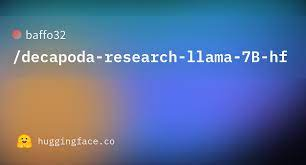
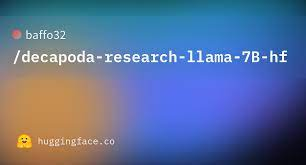

## install

In [1]:
!pip install datasets transformers loralib sentencepiece bitsandbytes -qq
!pip install git+https://github.com/huggingface/transformers -qq
!pip install git+https://github.com/huggingface/peft.git -qq

## setting

In [13]:
from peft import PeftModel
from transformers import LlamaTokenizer, LlamaForCausalLM, GenerationConfig
import textwrap

### 1. load

In [23]:
tokenizer = LlamaTokenizer.from_pretrained('baffo32/decapoda-research-llama-7B-hf')

model = LlamaForCausalLM.from_pretrained(
    'baffo32/decapoda-research-llama-7B-hf',
    load_in_8bit=True,
    device_map='auto',
)
model = PeftModel.from_pretrained(model, 'riverallzero/alpaca-lora-7b')

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

adapter_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/67.2M [00:00<?, ?B/s]

### 2. prompt

In [24]:
input_text ='''Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are Alpacas and how are they different to Lamas?

### Response:
'''

### 3. generate

In [25]:
def alpaca_talk(text):
    inputs = tokenizer(
        text,
        return_tensors='pt',
    )
    input_ids = inputs['input_ids'].cuda()

    generation_config = GenerationConfig(
        temperature=0.6,
        top_p=0.95,
        repetition_penalty=1.2,
    )

    generation_output = model.generate(
        input_ids=input_ids,
        generation_config=generation_config,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=256,
    )
    for s in generation_output.sequences:
        print(tokenizer.decode(s))

In [26]:
alpaca_talk(input_text)

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configurati

 ⁇  Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are Alpacas and how are they different to Lamas?

### Response:
Alpaca's are small, domesticated animals from South America related to camels and llamas. They have long coats with soft fibers used for clothing or blankets. Llamas on the other hand are larger than alpacas and native to Peru and Bolivia in South America. Their wool has shorter fibres which make it more suitable for knitting rather than spinning into yarn.
